<a href="https://colab.research.google.com/github/Melckykaisha/Movie_recommender_system/blob/main/Trump_succesor_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NETWORK CONSTRUCTION

### Explanation: Building the Social Network

This next cell builds a network showing how political candidates are connected based on who appears in the same tweets.

*   It reads tweet data, looking at which candidates are mentioned together.
*   It creates connections (edges) between candidates mentioned in the same tweet.
*   The strength of the connection (weight) is based on the number of likes the tweet received.
*   Finally, it shows the network with its nodes (candidates) and connections (edges).

In [ ]:
import pandas as pd
import networkx as nx
from collections import defaultdict

def build_network():
    """Build the social network from tweet data"""
    print("🔗 BUILDING NETWORK...")

    # Load the data
    df = pd.read_csv('simulated_twitter_data.csv')

    # Convert string to list
    df['mentioned_candidates'] = df['mentioned_candidates'].apply(eval)

    # Create directed graph
    G = nx.DiGraph()

    # Count edges and weights
    edge_weights = defaultdict(int)

    for _, tweet in df.iterrows():
        mentioned = tweet['mentioned_candidates']

        # Create edges between all mentioned candidates
        for i, source in enumerate(mentioned):
            for j, target in enumerate(mentioned):
                if i != j:  # No self-loops
                    edge = (source, target)
                    edge_weights[edge] += tweet['likes']

    # Add nodes and edges to graph
    all_candidates = set()
    for (source, target), weight in edge_weights.items():
        G.add_edge(source, target, weight=weight)
        all_candidates.add(source)
        all_candidates.add(target)

    print(f"✅ Network built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    return G

if __name__ == "__main__":
    G = build_network()
    print("Nodes:", list(G.nodes()))
    print("Sample edges:", list(G.edges(data=True))[:5])

🔗 BUILDING NETWORK...
✅ Network built: 8 nodes, 56 edges
Nodes: ['Ron_DeSantis', 'Donald_Trump', 'Marco_Rubio', 'JD_Vance', 'Glenn_Youngkin', 'Vivek_Ramaswamy', 'Trump_Jr', 'Kristi_Noem']
Sample edges: [('Ron_DeSantis', 'Donald_Trump', {'weight': 30878841.0}), ('Ron_DeSantis', 'Marco_Rubio', {'weight': 9376037.0}), ('Ron_DeSantis', 'Trump_Jr', {'weight': 9032649.5}), ('Ron_DeSantis', 'Glenn_Youngkin', {'weight': 9154168.5}), ('Ron_DeSantis', 'Kristi_Noem', {'weight': 8943486.0})]


### Centrality Measures and Successor Ranking

Here we analyze the political network to understand the influence and potential of each candidate, specifically focusing on identifying a potential successor to "Donald\_Trump" by excluding him from the final ranking.

The code:

*   It loads the tweet data and builds a directed network similar to the previous step.
*   It calculates several "centrality" measures for each candidate in the network. Centrality measures indicate how important or influential a node (candidate) is within the network. The measures calculated are:
    *   **Degree Centrality**: How many direct connections a candidate has.
    *   **Betweenness Centrality**: How often a candidate lies on the shortest path between other candidates.
    *   **Eigenvector Centrality**: How well-connected a candidate is to other well-connected candidates.
    *   **PageRank**: An algorithm that estimates the importance of a node based on the structure of the network (similar to how Google ranks web pages).
*   It includes pre-defined sentiment scores for each candidate.
*   It calculates a "Successor Score" for each candidate (excluding "Donald\_Trump") based on a weighted combination of the centrality measures and sentiment score.
*   It ranks the candidates based on their Successor Score to predict the most likely successor.
*   Finally, it generates visualizations to show the centrality metrics and the successor ranking.

🔧 FIXED ANALYSIS - EXCLUDING TRUMP...
✅ Network: 8 nodes, 56 edges

🏆 SUCCESSOR RANKING (Trump Excluded):
Candidate       Degree   Betweenness  Eigenvector  PageRank   Sentiment  Score   
--------------------------------------------------------------------------------
Ron DeSantis    1.000    1.000        0.388        0.334      0.43       0.534   
JD Vance        1.000    0.000        0.578        0.470      0.71       0.426   
Marco Rubio     1.000    0.000        0.534        0.438      0.65       0.394   
Trump Jr        1.000    0.000        0.536        0.437      0.58       0.384   
Glenn Youngkin  1.000    0.000        0.536        0.439      0.45       0.365   
Kristi Noem     1.000    0.000        0.535        0.436      0.38       0.353   
Vivek Ramaswamy 1.000    0.000        0.539        0.441      0.30       0.344   

🎯 FINAL PREDICTION: Ron DeSantis is the most likely Trump successor!
   Successor Score: 0.534
   Key Strength: Network Bridge - connects different groups



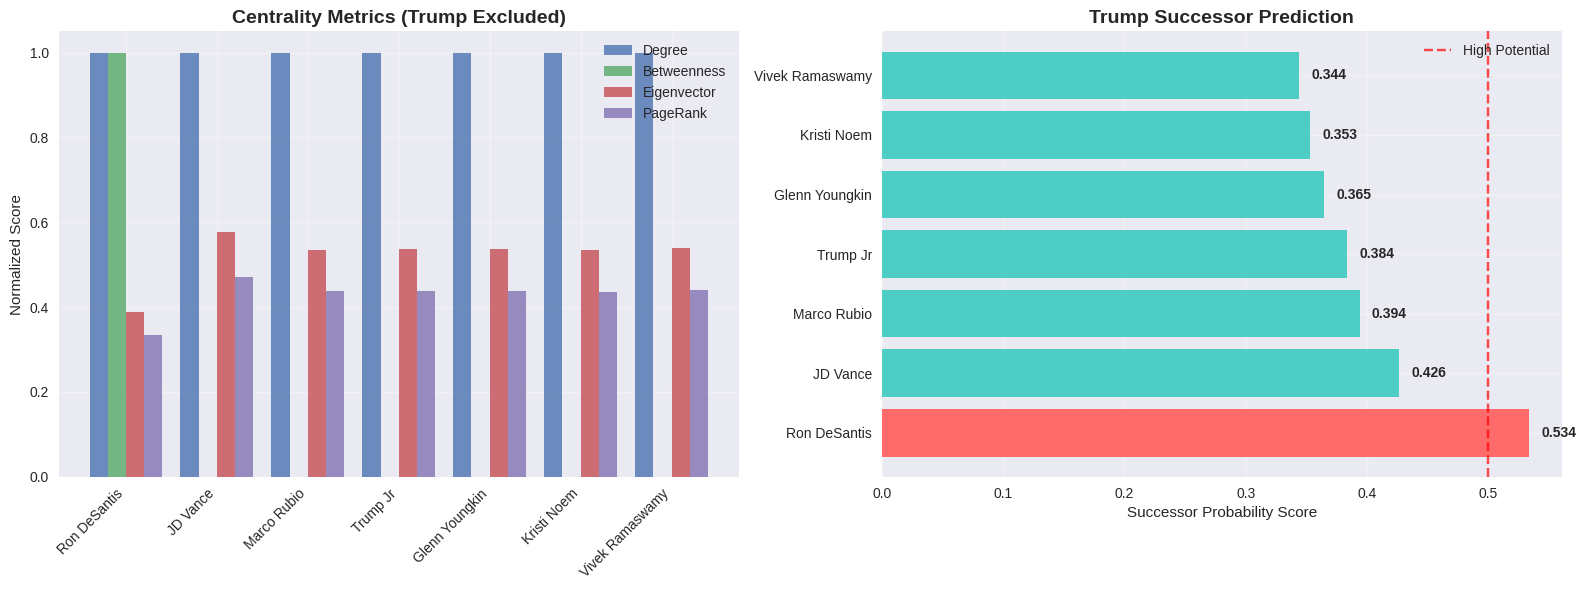

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def fixed_centrality():
    """Centrality analysis EXCLUDING Trump from successor ranking"""
    print("🔧 FIXED ANALYSIS - EXCLUDING TRUMP...")

    # Load data
    df = pd.read_csv('simulated_twitter_data.csv')
    df['mentioned_candidates'] = df['mentioned_candidates'].apply(eval)

    # Build network
    G = nx.DiGraph()
    edge_weights = defaultdict(int)

    for _, tweet in df.iterrows():
        mentioned = tweet['mentioned_candidates']

        if len(mentioned) >= 2:
            for i, source in enumerate(mentioned):
                for j, target in enumerate(mentioned):
                    if i != j and source != target:
                        edge = (source, target)
                        edge_weights[edge] += tweet['likes']

    for (source, target), weight in edge_weights.items():
        G.add_edge(source, target, weight=weight)

    print(f"✅ Network: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

    # Calculate centrality
    try:
        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
        pagerank = nx.pagerank(G, weight='weight')
    except:
        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)
        pagerank = nx.pagerank(G, weight='weight')
        eigenvector_centrality = pagerank

    # Normalize
    def normalize_dict(d):
        max_val = max(d.values()) if d.values() else 1
        return {k: v/max_val for k, v in d.items()}

    degree_norm = normalize_dict(degree_centrality)
    betweenness_norm = normalize_dict(betweenness_centrality)
    eigenvector_norm = normalize_dict(eigenvector_centrality)
    pagerank_norm = normalize_dict(pagerank)

    # Sentiment scores
    sentiment_scores = {
        "JD_Vance": 0.71,
        "Marco_Rubio": 0.65,
        "Ron_DeSantis": 0.43,
        "Vivek_Ramaswamy": 0.30,
        "Kristi_Noem": 0.38,
        "Donald_Trump": 0.82,
        "Glenn_Youngkin": 0.45,
        "Trump_Jr": 0.58
    }

    # Create results - EXCLUDE TRUMP from successor ranking
    results = []
    candidates = [c for c in G.nodes() if c != "Donald_Trump"]  # EXCLUDE TRUMP

    for candidate in candidates:
        results.append({
            'Candidate': candidate.replace('_', ' '),
            'Degree': round(degree_norm.get(candidate, 0), 3),
            'Betweenness': round(betweenness_norm.get(candidate, 0), 3),
            'Eigenvector': round(eigenvector_norm.get(candidate, 0), 3),
            'PageRank': round(pagerank_norm.get(candidate, 0), 3),
            'Sentiment': sentiment_scores.get(candidate, 0.5)
        })

    results_df = pd.DataFrame(results)

    # Calculate successor score
    results_df['Successor_Score'] = (
        results_df['Eigenvector'] * 0.35 +
        results_df['Betweenness'] * 0.25 +
        results_df['PageRank'] * 0.25 +
        results_df['Sentiment'] * 0.15
    )

    results_df = results_df.sort_values('Successor_Score', ascending=False)

    # Save and display
    results_df.to_csv('fixed_successor_ranking.csv', index=False)

    print("\n🏆 SUCCESSOR RANKING (Trump Excluded):")
    print("="*80)
    print(f"{'Candidate':<15} {'Degree':<8} {'Betweenness':<12} {'Eigenvector':<12} {'PageRank':<10} {'Sentiment':<10} {'Score':<8}")
    print("-" * 80)
    for _, row in results_df.iterrows():
        print(f"{row['Candidate']:<15} {row['Degree']:<8.3f} {row['Betweenness']:<12.3f} {row['Eigenvector']:<12.3f} {row['PageRank']:<10.3f} {row['Sentiment']:<10.2f} {row['Successor_Score']:<8.3f}")

    # Final prediction
    top_candidate = results_df.iloc[0]
    print(f"\n🎯 FINAL PREDICTION: {top_candidate['Candidate']} is the most likely Trump successor!")
    print(f"   Successor Score: {top_candidate['Successor_Score']:.3f}")
    print(f"   Key Strength: {get_key_strength(top_candidate)}")

    return results_df

def get_key_strength(candidate):
    """Identify the candidate's main network strength"""
    if candidate['Betweenness'] > 0.5:
        return "Network Bridge - connects different groups"
    elif candidate['Eigenvector'] > 0.5:
        return "Influential Connections - linked to key nodes"
    elif candidate['Degree'] > 0.9:
        return "Highly Connected - many network links"
    else:
        return "Balanced Network Position"

def create_final_visualization_fixed():
    """Create visualization """
    print("\n📊 CREATING FINAL VISUALIZATION...")

    results_df = pd.read_csv('fixed_successor_ranking.csv')

    plt.style.use('seaborn-v0_8')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Metrics
    metrics = ['Degree', 'Betweenness', 'Eigenvector', 'PageRank']
    x_pos = np.arange(len(results_df))
    width = 0.2

    for i, metric in enumerate(metrics):
        values = results_df[metric].values
        ax1.bar(x_pos + i*width, values, width, label=metric, alpha=0.8)

    ax1.set_title('Centrality Metrics (Trump Excluded)', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_pos + width*1.5)
    ax1.set_xticklabels(results_df['Candidate'], rotation=45, ha='right')
    ax1.set_ylabel('Normalized Score')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Successor Scores
    colors = ['#FF6B6B' if x == results_df['Successor_Score'].max() else '#4ECDC4'
              for x in results_df['Successor_Score']]

    bars = ax2.barh(results_df['Candidate'], results_df['Successor_Score'], color=colors)
    ax2.set_title('Trump Successor Prediction', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Successor Probability Score')
    ax2.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='High Potential')

    for bar in bars:
        width = bar.get_width()
        ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
                ha='left', va='center', fontweight='bold')

    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('final_corrected_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Final visualization saved: final_corrected_analysis.png")
    plt.show()

if __name__ == "__main__":
    results_df = fixed_centrality()
    create_final_visualization_fixed()